# Functions

In [2]:
def squarer(x):
    return x**2

squarer(2)

4

In [4]:
square = squarer(5)
square

25

In [5]:
[squarer(x) for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [8]:
def say_hello():
    print("hi")

say_hello()

hi


### default 
- default value is only used if no other vaule is called
- for example when it reuterns friend it is a parameter (when you define it)
- a argument is when you call the function later on as in the example Bella

In [10]:
def say_hello(name = "friend"):
    print(f"hi {name}")

say_hello()

hi friend


In [11]:
say_hello("Bella")

hi Bella


In [12]:
def smallest(number1, number2):
    if number1 > number2:
        return number2
    return number1

smallest(1,5), smallest(5,-5)

(1, -5)

## Keyword argumetn

In [16]:
def count_words(text):
    words = text.split()
    return len(words)

count_words(text = "I stand on the shoulders of giants")

7

## arbitary arguments

In [17]:
def my_mean(*numbers):
    print(numbers)

my_mean(1,2,3)

(1, 2, 3)


In [19]:
def my_mean(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number
    return sum_/len(numbers)

my_mean(1,4,5)

3.3333333333333335

## unpacking arguments

In [22]:
def say_hello(name, age):
    print(f"hi {name} you are {age} years old")

pet = ("Bella", 4)

# without the * you are not abel to only return one argument, this is called unpacking
say_hello(*pet)

hi Bella you are 4 years old


## lambda function inside a function

In [50]:
def extract_data(filename):
    with open (filename, "r") as file:
        data = file.readlines()

    year, it, economy = data
    clean_row = lambda row: [int (item) for item in row.strip().split(",")[1:]]
    year = clean_row(year)
    it = clean_row(it)
    economy = clean_row(economy)

    return year, it, economy

extract_data("../data/students_yh_it_economy.txt")

([2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023,
  2024],
 [2587,
  2546,
  2797,
  2817,
  2857,
  2903,
  3160,
  3398,
  4054,
  4937,
  5812,
  6183,
  6210,
  5704,
  7086,
  10283,
  12852,
  14255,
  15162,
  16447],
 [6238,
  7582,
  8807,
  10264,
  11286,
  11905,
  12179,
  11946,
  12253,
  12261,
  11670,
  11529,
  12193,
  13797,
  15994,
  18491,
  18540,
  17818,
  17354,
  17380])

## variable number of keyword arguments **kwargs

In [47]:
def test_kwargs(**kwargs):
    print(kwargs)
    print(kwargs.get("type"))

test_kwargs(x = 5, name = "Bella", type = "rabbit")

{'x': 5, 'name': 'Bella', 'type': 'rabbit'}
rabbit


<Axes: title={'center': 'Number of students in IT'}, xlabel='Year', ylabel='Number students'>

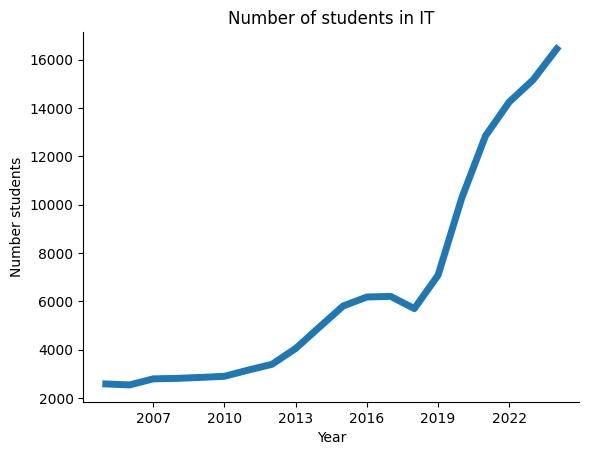

In [76]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

year, it, economy =  extract_data("../data/students_yh_it_economy.txt")
fig, ax= plt.subplots(1)

def plot_data(ax, x, y, **options):
    ax.plot(x,y,linewidth = options.get("linewidth", 3))
    ax.set(
        xlabel=options.get("xlabel"),
        ylabel=options.get("ylabel"),
        title=options.get("title"),
    )
    # this line is to control the floating numbers in the x-axel
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # this line is to remove the frame (spine) around the plot
    ax.spines[["top", "right"]].set_visible(False)
    return ax

# keyword arguments except x and y come from options(dict) and .get gets us the spicific vaules we want
plot_data(
    ax,
    x = year,
    y = it,
    linewidth = 5,
    title = "Number of students in IT",
    xlabel = "Year",
    ylabel = "Number students",
    )

<Axes: title={'center': 'Number of students in Economy'}, xlabel='Year', ylabel='Number students'>

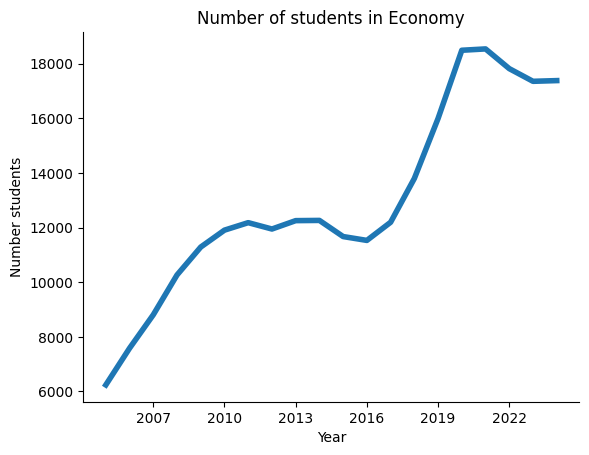

In [77]:
fig, ax = plt.subplots(1)

plot_data(
    ax,
    x=year,
    y=economy,
    linewidth=4,
    title="Number of students in Economy",
    xlabel="Year",
    ylabel="Number students",
    )